In [2]:
from google.colab import drive
drive.mount('/content/drive')
!which python
!python --version
%env PYTHONPATH=
%cd /content/drive/MyDrive/
f = open('key')
for i in f:
  GIT_TOKEN = i

%cd ControlNet

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/usr/local/bin/python
Python 3.9.16
env: PYTHONPATH=
/content/drive/MyDrive
/content/drive/MyDrive/ControlNet


論文<br>
<br>
<br>
GitHub<br>
https://github.com/lllyasviel/ControlNet<br>
<br>
<a href="https://colab.research.google.com/github/kaz12tech/ai_demos/blob/master/ControlNet_demo.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# setup environment

## check GPU

In [3]:
!nvidia-smi

Thu Mar  9 23:14:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## clone code from Github

In [5]:
%cd /content

!git clone https://github.com/lllyasviel/ControlNet.git

# # Commits on Feb 15, 2023
%cd /content/ControlNet
!git checkout f8a359543a6bbc1080b81401d40323cb61822f13

/content
Cloning into 'ControlNet'...
remote: Enumerating objects: 1258, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 1258 (delta 2), reused 2 (delta 0), pack-reused 1252
Receiving objects: 100% (1258/1258), 122.36 MiB | 25.56 MiB/s, done.
Resolving deltas: 100% (544/544), done.
/content/ControlNet
Note: switching to 'f8a359543a6bbc1080b81401d40323cb61822f13'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at f8a3595 Update train.md


## install libraries

In [6]:
%cd /content/ControlNet

!pip uninstall torch torchtext -y
!pip install torch==1.12.1 torchvision==0.13.1 torchaudio==0.12.1
!pip install omegaconf==2.1.1 einops==0.3.0
!pip install pytorch-lightning==1.5.0
!pip install transformers==4.19.2 open_clip_torch==2.0.2

/content/ControlNet
Found existing installation: torch 1.13.1+cu116
Uninstalling torch-1.13.1+cu116:
  Successfully uninstalled torch-1.13.1+cu116
Found existing installation: torchtext 0.14.1
Uninstalling torchtext-0.14.1:
  Successfully uninstalled torchtext-0.14.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.4/776.4 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 79.2 MB/s eta 0:00:00
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.13.1+cu116
    Uninstalling torchaudio-0.13.1+cu116:
      Successfully uninstalled torchaudio-0.13.1+cu116
Looking in

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 KB 46.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 27.1 MB/s eta 0:00:00
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492036 sha256=393a2eb0042c7599eeea12f0fef8cab2a3b16e4dab8677f0ac6697353c978644
  Stored in directory: /root/.cache/pip/wheels/bf/5d/6a/2e53874f

## import library

In [7]:
%cd /content/ControlNet

import numpy as np
from PIL import Image as PilImage
import einops
import matplotlib.pyplot as plt

from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

import torch
from pytorch_lightning import seed_everything

from cldm.model import create_model, load_state_dict
from ldm.models.diffusion.ddim import DDIMSampler

from annotator.util import resize_image, HWC3

/content/ControlNet


# load model

In [8]:
%cd /content/ControlNet

# download model from huggingface
!wget -c https://huggingface.co/lllyasviel/ControlNet/resolve/main/models/control_sd15_scribble.pth \
      -O ./models/control_sd15_scribble.pth

/content/ControlNet
--2023-03-09 23:19:54--  https://huggingface.co/lllyasviel/ControlNet/resolve/main/models/control_sd15_scribble.pth
Resolving huggingface.co (huggingface.co)... 54.235.118.239, 3.231.67.228, 2600:1f18:147f:e850:e203:c458:10cd:fc3c, ...
Connecting to huggingface.co (huggingface.co)|54.235.118.239|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/f6/65/f665e553e8fd16131981a96c629e785939f08080bb3cbf8d2b7f5ddbd9e6100a/591bc5a70a167821634fc3d4870217d7501bd839615540d1cc158579390e9ad3?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27control_sd15_scribble.pth%3B+filename%3D%22control_sd15_scribble.pth%22%3B&Expires=1678660913&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2Y2LzY1L2Y2NjVlNTUzZThmZDE2MTMxOTgxYTk2YzYyOWU3ODU5MzlmMDgwODBiYjNjYmY4ZDJiN2Y1ZGRiZDllNjEwMGEvNTkxYmM1YTcwYTE2NzgyMTYzNGZjM2Q0ODcwMjE3ZDc1MDFiZDgzOTYxNTU0MGQxY2MxNTg1NzkzOTBlOWFk

In [9]:
%cd /content/ControlNet

model = create_model('./models/cldm_v15.yaml')
model.load_state_dict(load_state_dict('./models/control_sd15_scribble.pth', location='cuda'))
model = model.cuda()
ddim_sampler = DDIMSampler(model)

/content/ControlNet
No module 'xformers'. Proceeding without it.
ControlLDM: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


Downloading:   0%|          | 0.00/939k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/512k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/905 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.59G [00:00<?, ?B/s]

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.4.self_attn.q_proj.bias', 'vision_model.encoder.layers.5.mlp.fc1.bias', 'vision_model.encoder.layers.9.layer_norm1.weight', 'vision_model.encoder.layers.2.layer_norm1.weight', 'vision_model.encoder.layers.10.layer_norm1.bias', 'vision_model.encoder.layers.15.layer_norm1.weight', 'vision_model.encoder.layers.1.layer_norm2.weight', 'vision_model.encoder.layers.8.self_attn.v_proj.weight', 'vision_model.encoder.layers.19.self_attn.k_proj.bias', 'vision_model.encoder.layers.6.self_attn.k_proj.bias', 'vision_model.encoder.layers.13.layer_norm1.weight', 'vision_model.encoder.layers.9.mlp.fc2.weight', 'vision_model.encoder.layers.9.self_attn.q_proj.bias', 'vision_model.encoder.layers.17.self_attn.out_proj.bias', 'vision_model.encoder.layers.9.layer_norm2.bias', 'vision_model.encoder.layers.4.layer_norm2.weight', 'vision_model.encoder.layers.14.layer

Loaded model config from [./models/cldm_v15.yaml]
Loaded state_dict from [./models/control_sd15_scribble.pth]


# setup prompt

In [42]:
prompt = 'a turtle walking through a crowded city street' # @param {type:"string"}

In [47]:
# active and negative prompt
a_prompt = 'best quality, extremely detailed, golden hour'
n_prompt = 'longbody, lowres, bad anatomy, bad hands, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, black and white'

# setup config

In [12]:
image_resolution = 512
num_samples = 1
seed = 12
ddim_steps = 20
eta = 0.0
scale = 9.0

# setup image

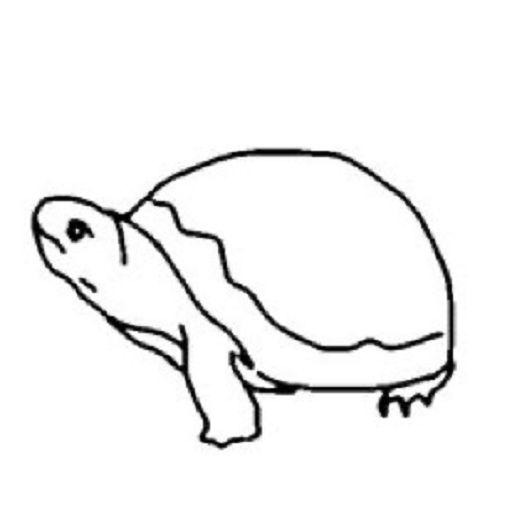

In [35]:
img_path = '/content/ControlNet/test_imgs/user_1.png'
PilImage.open(img_path)

# Scribble to Image

In [43]:
#@title inference function
def inference(img_path, prompt, a_prompt, n_prompt):
  # preprocess image
  input_img = np.array(PilImage.open(img_path))
  img = resize_image(HWC3(input_img), image_resolution)
  H, W, C = img.shape

  # initialize detect map
  detected_map = np.zeros_like(img, dtype=np.uint8)
  detected_map[np.min(img, axis=2) < 127] = 255
  control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
  control = torch.stack([control for _ in range(num_samples)], dim=0)
  control = einops.rearrange(control, 'b h w c -> b c h w').clone()

  # set random seed
  seed_everything(seed)

  # get conftioning and unconditioning
  cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([prompt + ', ' + a_prompt] * num_samples)]}
  un_cond = {"c_concat": [control], "c_crossattn": [model.get_learned_conditioning([n_prompt] * num_samples)]}
  shape = (4, H // 8, W // 8)

  # sampling
  samples, intermediates = ddim_sampler.sample(
      ddim_steps, num_samples,
      shape, cond, verbose=False, eta=eta,
      unconditional_guidance_scale=scale,
      unconditional_conditioning=un_cond)
  
  # post process
  x_samples = model.decode_first_stage(samples)
  x_samples = (einops.rearrange(x_samples, 'b c h w -> b h w c') * 127.5 + 127.5).cpu().numpy().clip(0, 255).astype(np.uint8)

  results = [x_samples[i] for i in range(num_samples)]
  np_imgs = [255 - detected_map] + results

  return np_imgs

In [48]:
np_imgs = inference(img_path, prompt, a_prompt, n_prompt)

INFO:pytorch_lightning.utilities.seed:Global seed set to 12


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


In [49]:
src = PilImage.fromarray(np_imgs[0])
dst = PilImage.fromarray(np_imgs[1])

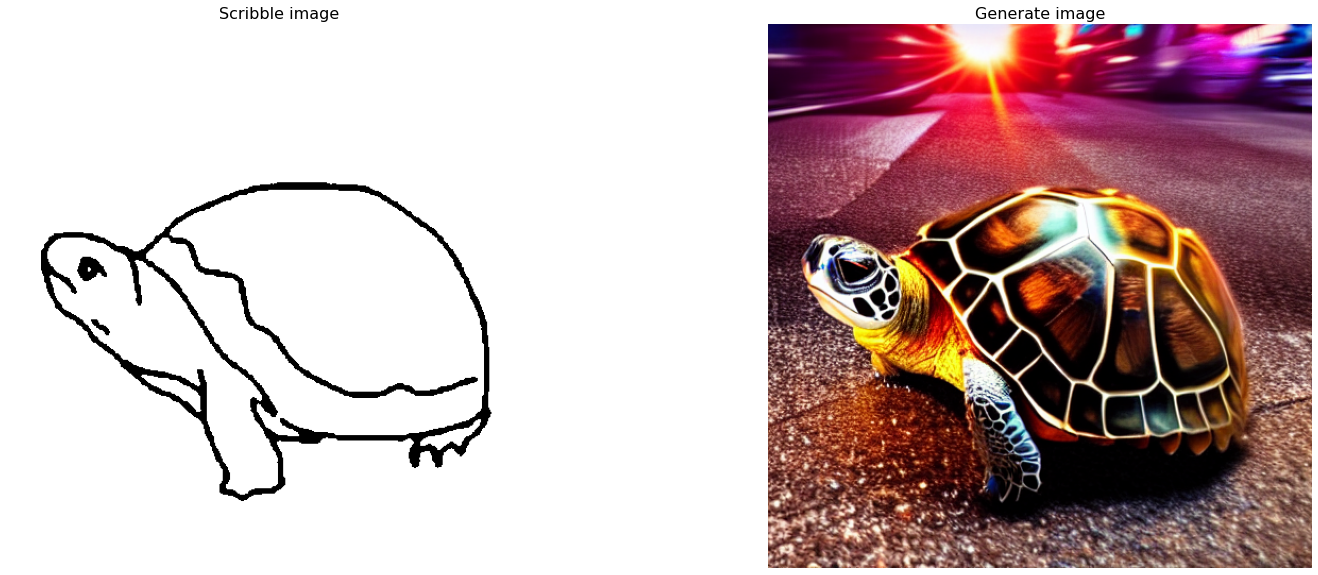

In [50]:
fig = plt.figure(figsize=(25, 10))

ax1 = fig.add_subplot(1, 2, 1)
plt.title('Scribble image', fontsize=16)
ax1.axis('off')
ax1.imshow(src)

ax2 = fig.add_subplot(1, 2, 2)
plt.title('Generate image', fontsize=16)
ax2.axis('off')
ax2.imshow(dst)

plt.show()

# let's do scribble on google colab

In [ ]:
canvas_html = """
<canvas width=%d height=%d></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""

In [ ]:
def draw(filename='drawing.png', w=512, h=512, line_width=1):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)

In [ ]:
draw()

In [ ]:
img_path = 'drawing.png'
PilImage.open(img_path)

In [ ]:
prompt = 'Fansy cute girl, 4K, art' # @param {type:"string"}

In [ ]:
np_imgs = inference(img_path, prompt)

In [ ]:
src = PilImage.fromarray(np_imgs[0])
dst = PilImage.fromarray(np_imgs[1])

fig = plt.figure(figsize=(25, 10))

ax1 = fig.add_subplot(1, 2, 1)
plt.title('Scribble image', fontsize=16)
ax1.axis('off')
ax1.imshow(src)

ax2 = fig.add_subplot(1, 2, 2)
plt.title('Generate image', fontsize=16)
ax2.axis('off')
ax2.imshow(dst)

plt.show()